<a href="https://colab.research.google.com/github/JaquelineMera/p1_segmentacion_clientes_rfm/blob/main/pruebassignificancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Autenticar con Google Cloud
from google.colab import auth
auth.authenticate_user()
# Importa la biblioteca bigquery del paquete google.cloud
from google.cloud import bigquery
import pandas as pd
# Declarar el proyecto, dataset y tabla
project_id = "proyecto2-hipotesis-spotify"
dataset = "dataset_spotify"
table = "dataset_spotify_03"
# Configurar el cliente de BigQuery con el ID del proyecto
client = bigquery.Client(project=project_id)
# Ejecutar la Consulta en BigQuery
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""
# Ejecutar la consulta y convertir los resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df.head())

  track_id track_name_limpio artist_name_limpio  artist_count  released_year  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1           2013   
1  3921634       Blank Space       Taylor Swift             1           2014   
2  4796316             Style       Taylor Swift             1           2014   
3  4527090            Yellow      Chris Molitor             1           1999   
4  3126367      Viva La Vida           Coldplay             1           2008   

   released_month  released_day release_date  in_spotify_playlists  \
0               1             1   2013-01-01                 12859   
1               1             1   2014-01-01                 11434   
2               1             1   2014-01-01                  7830   
3               1             1   1999-01-01                 31358   
4               1             1   2008-01-01                 33898   

   in_spotify_charts  ...  total_playlist  cat_streams  cat_bpm  \
0                110  ...      

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              948 non-null    object
 1   track_name_limpio     948 non-null    object
 2   artist_name_limpio    948 non-null    object
 3   artist_count          948 non-null    Int64 
 4   released_year         948 non-null    Int64 
 5   released_month        948 non-null    Int64 
 6   released_day          948 non-null    Int64 
 7   release_date          948 non-null    dbdate
 8   in_spotify_playlists  948 non-null    Int64 
 9   in_spotify_charts     948 non-null    Int64 
 10  streams_limpio        948 non-null    Int64 
 11  in_apple_playlists    947 non-null    Int64 
 12  in_apple_charts       947 non-null    Int64 
 13  in_deezer_playlists   947 non-null    Int64 
 14  in_deezer_charts      947 non-null    Int64 
 15  in_shazam_charts      897 non-null    In

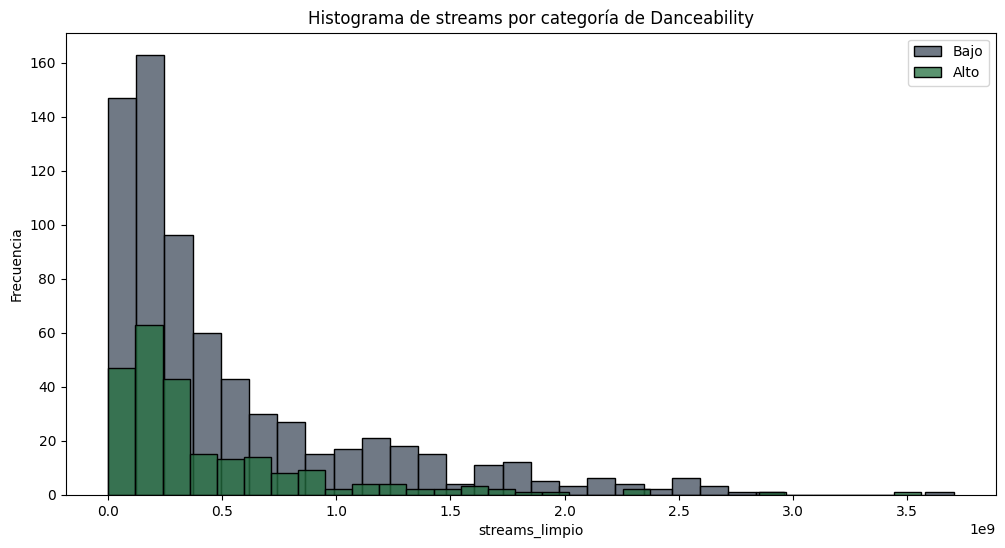

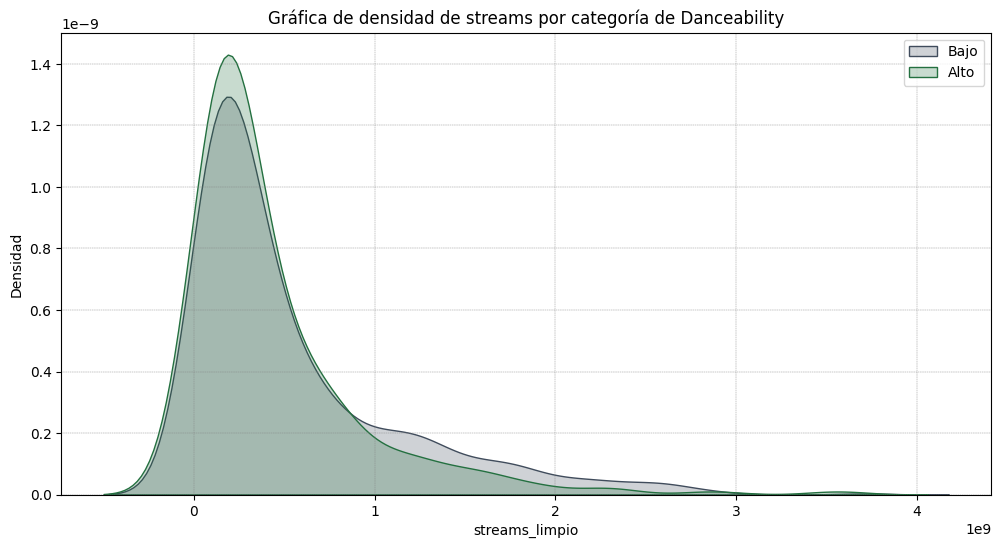

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Crear el histograma para la categoría bajo y alto de Danceability
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_danceability'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_danceability'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Danceability')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 1 Crear la gráfica de densidad para la categoría bajo y alto de Danceability
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_danceability'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_danceability'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Danceability')
plt.grid(True, linestyle='--', color='gray', linewidth=0.3)
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

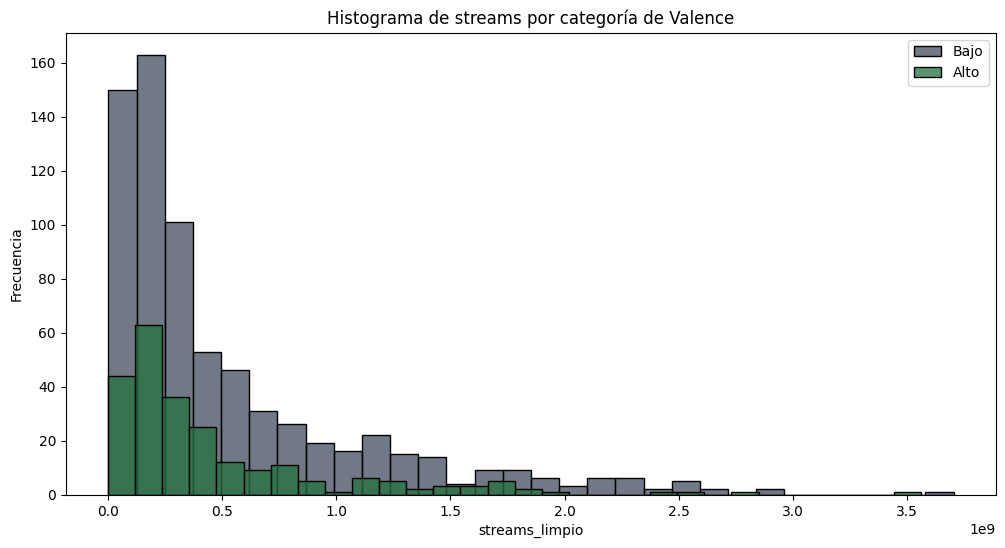

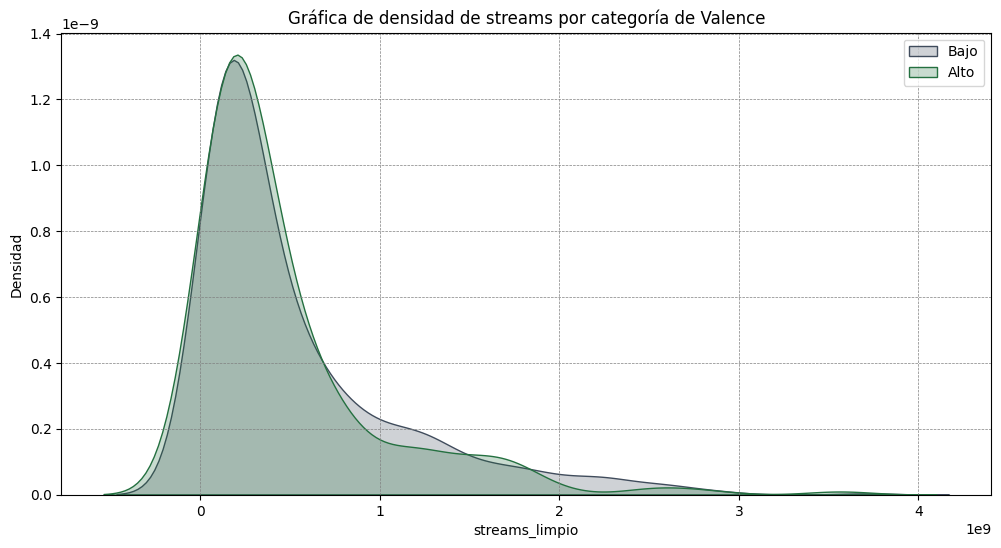

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Crear el histograma para la categoría bajo y alto de Valence
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_valence'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_valence'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Valence')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 2 Crear la gráfica de densidad para la categoría bajo y alto de Valence
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_valence'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_valence'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Valence')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

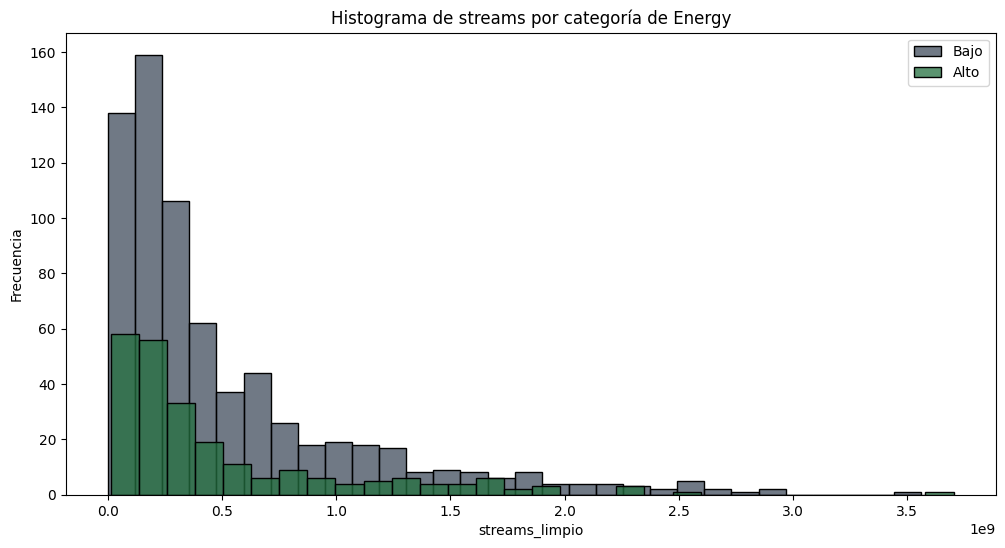

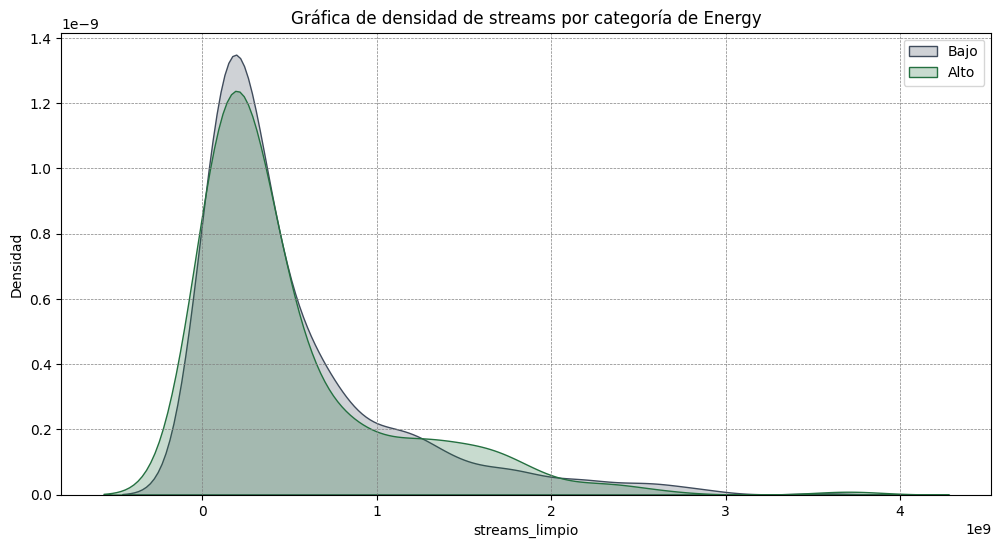

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 3 Crear el histograma para la categoría bajo y alto de Energy
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_energy'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_energy'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Energy')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 3 Crear la gráfica de densidad para la categoría bajo y alto de Energy
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_energy'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_energy'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Energy')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

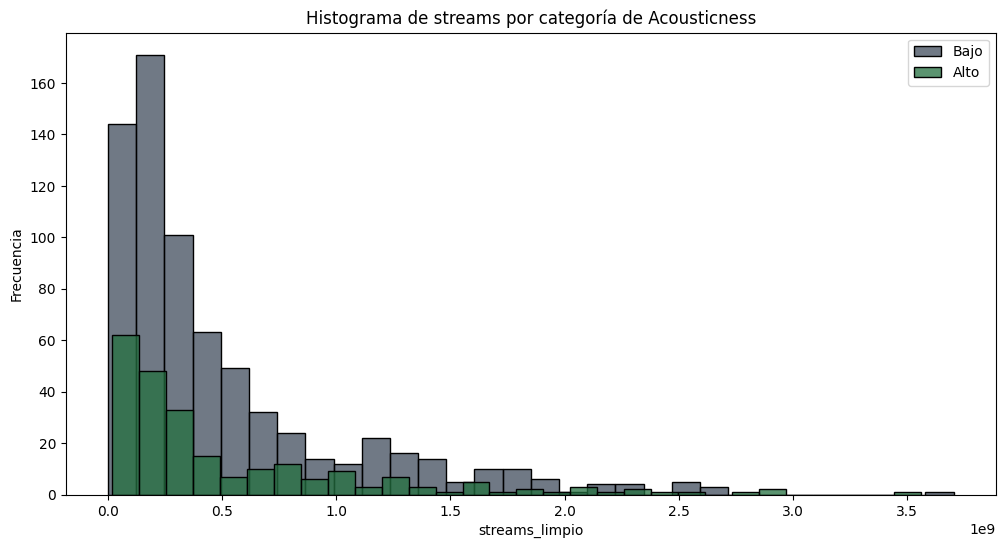

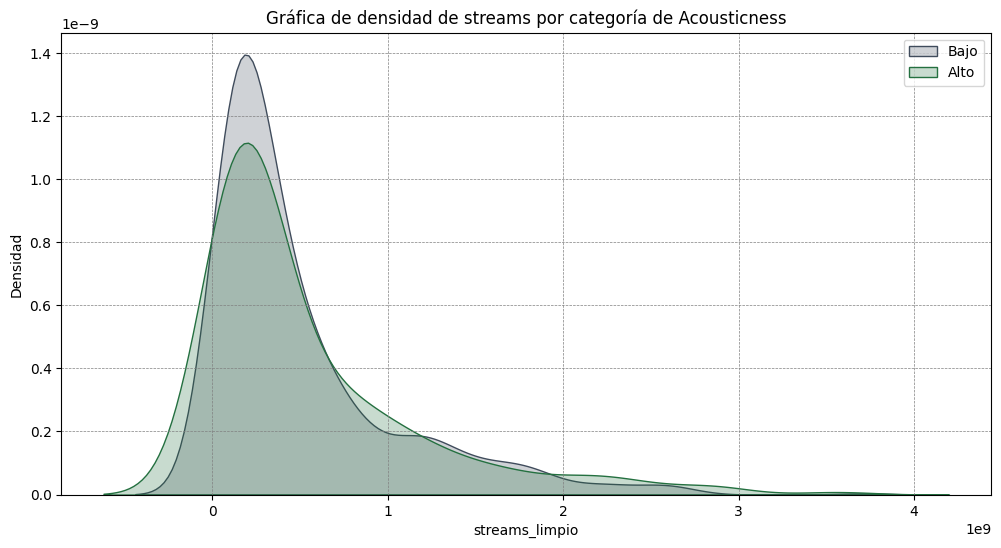

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 4 Crear el histograma para la categoría bajo y alto de Acousticness
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_acousticness'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_acousticness'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Acousticness')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 4 Crear la gráfica de densidad para la categoría bajo y alto de Acousticness
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_acousticness'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_acousticness'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Acousticness')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

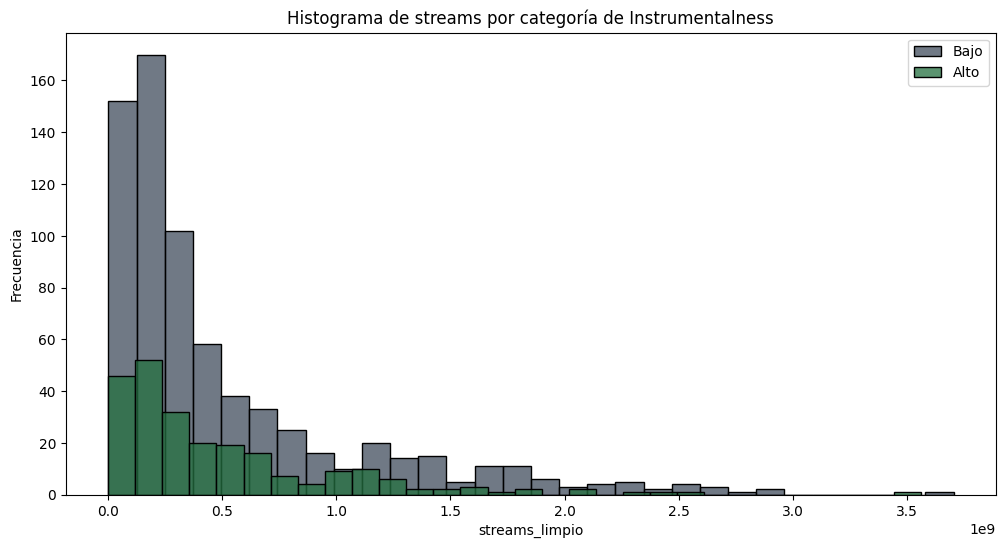

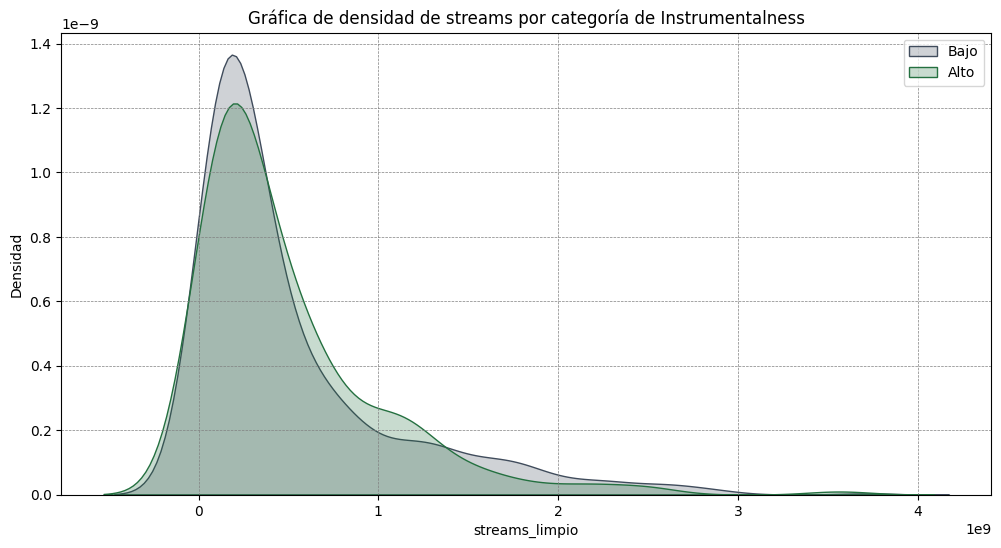

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 5 Crear el histograma para la categoría bajo y alto de Instrumentalness
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_instrumentalness'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_instrumentalness'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Instrumentalness')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 5 Crear la gráfica de densidad para la categoría bajo y alto de Instrumentalness
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_instrumentalness'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_instrumentalness'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Instrumentalness')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

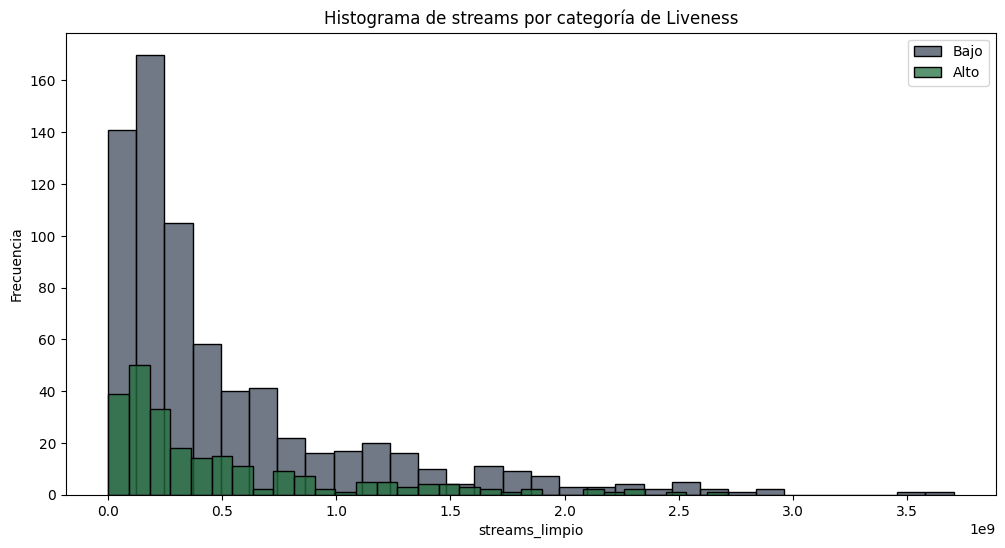

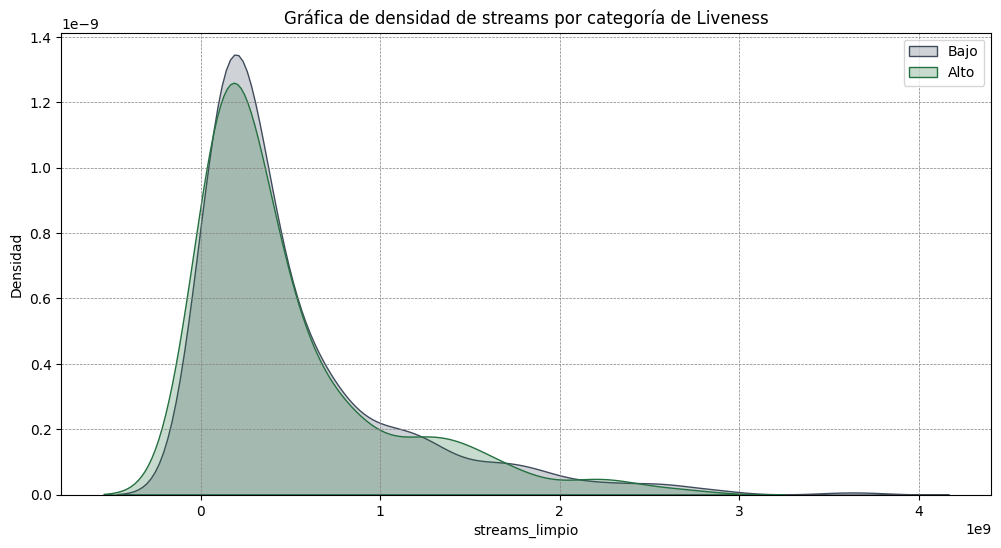

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 6 Crear el histograma para la categoría bajo y alto de Liveness
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_liveness'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_liveness'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Liveness')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 6 Crear la gráfica de densidad para la categoría bajo y alto de Liveness
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_liveness'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_liveness'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Liveness')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

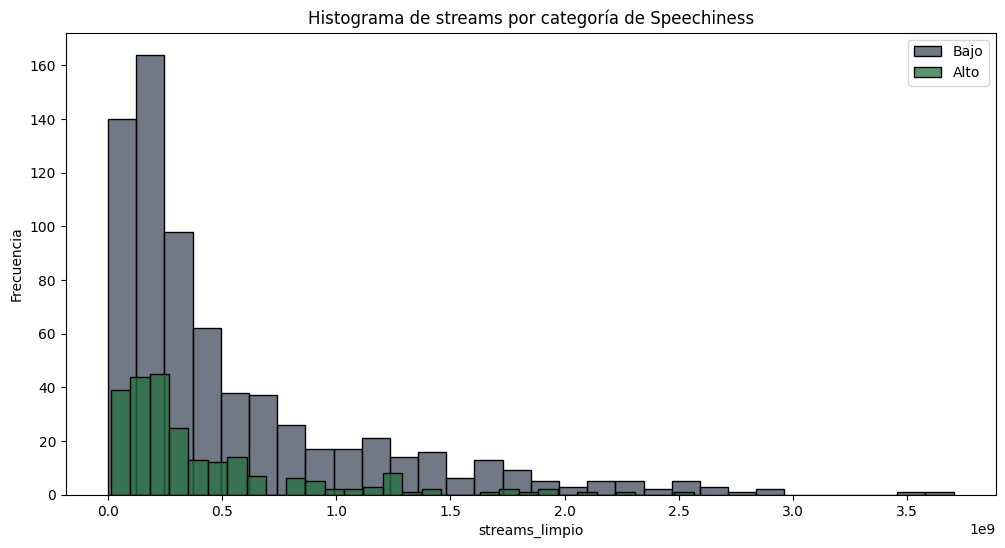

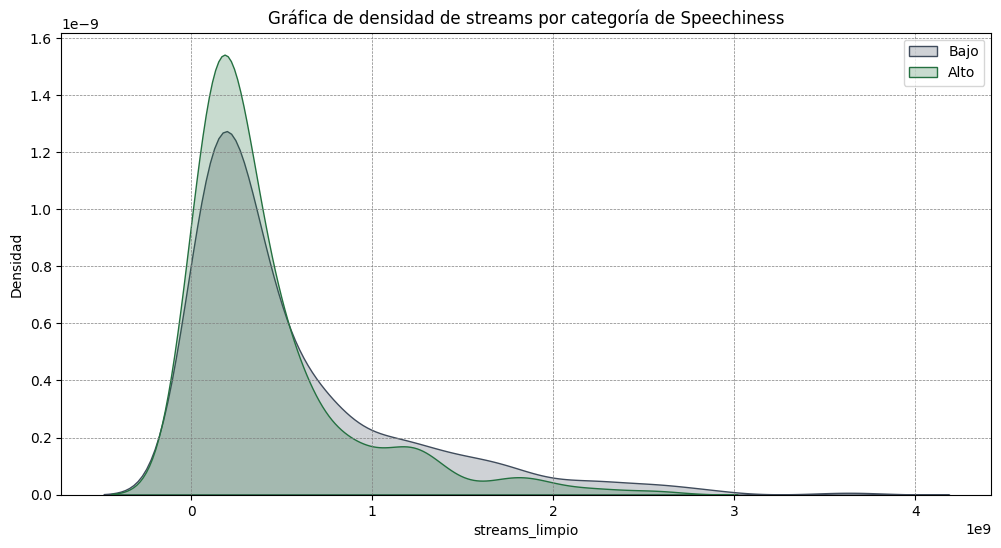

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 7 Crear el histograma para la categoría bajo y alto de Speechiness
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_speechiness'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_speechiness'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de Speechiness')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 7 Crear la gráfica de densidad para la categoría bajo y alto de Speechiness
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_speechiness'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_speechiness'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de Speechiness')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

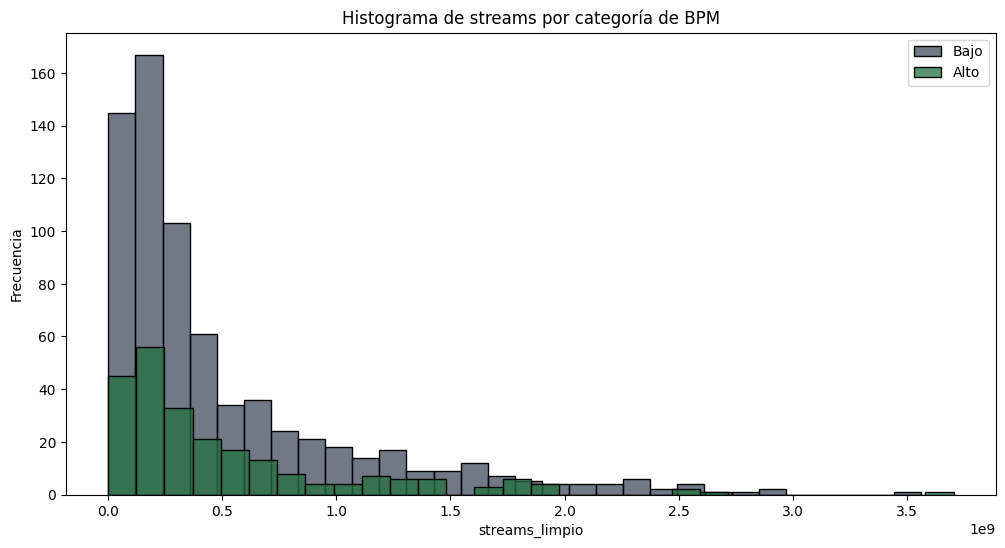

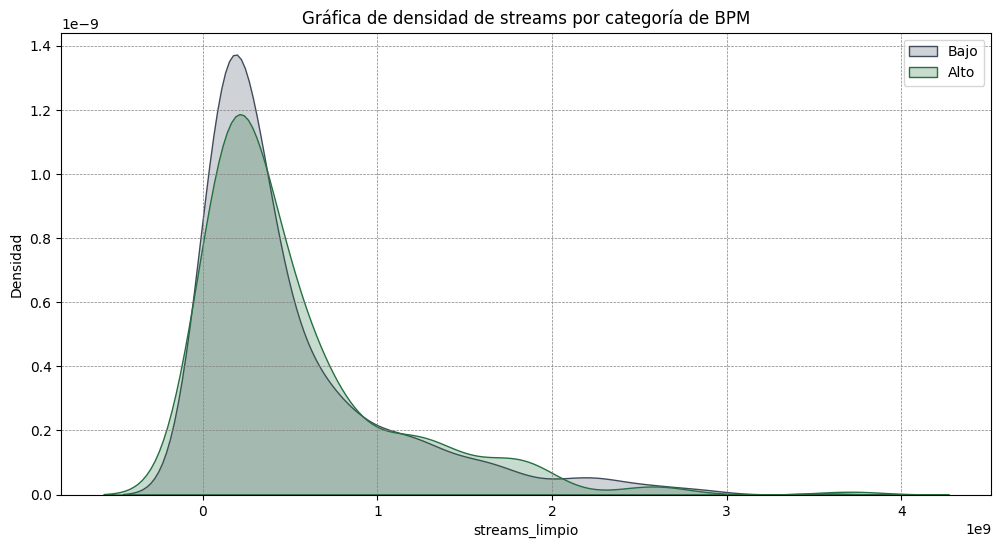

In [ ]:
#Revisar la distribución de nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

# 8 Crear el histograma para la categoría bajo y alto de BPM
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cat_bpm'] == 'bajo']['streams_limpio'], kde=False, color='#404c5c', label='Bajo', bins=30)
sns.histplot(df[df['cat_bpm'] == 'alto']['streams_limpio'], kde=False, color='#247040', label='Alto', bins=30)
plt.title('Histograma de streams por categoría de BPM')
plt.xlabel('streams_limpio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 8 Crear la gráfica de densidad para la categoría bajo y alto de BPM
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['cat_bpm'] == 'bajo']['streams_limpio'], fill=True, color='#404c5c', label='Bajo')
sns.kdeplot(df[df['cat_bpm'] == 'alto']['streams_limpio'], fill=True, color='#247040', label='Alto')
plt.title('Gráfica de densidad de streams por categoría de BPM')
plt.xlabel('streams_limpio')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
# Test T y Test de Wilcoxon (Mann-Whitney U)
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

# 1 Realizar los tests estadísticos para Danceability
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_dance = df[df['cat_danceability'] == 'alto']['streams_limpio'].tolist()
streams_bajo_dance = df[df['cat_danceability'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_dance)
avg_streams_bajo = np.mean(streams_bajo_dance)

# Característica a evaluar
print("----------DANCEABILITY----------")
# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_dance, streams_bajo_dance, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_dance, streams_bajo_dance, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 2 Realizar los tests estadísticos para Valence
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_valence = df[df['cat_valence'] == 'alto']['streams_limpio'].tolist()
streams_bajo_valence = df[df['cat_valence'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_valence)
avg_streams_bajo = np.mean(streams_bajo_valence)

# Característica a evaluar
print()
print("----------VALENCE----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_valence, streams_bajo_valence, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_valence, streams_bajo_valence, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 3 Realizar los tests estadísticos para Energy
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_energy = df[df['cat_energy'] == 'alto']['streams_limpio'].tolist()
streams_bajo_energy = df[df['cat_energy'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_energy)
avg_streams_bajo = np.mean(streams_bajo_energy)

# Característica a evaluar
print()
print("----------ENERGY----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_energy, streams_bajo_energy, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_energy, streams_bajo_energy, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 4 Realizar los tests estadísticos para Acousticness
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_acoustic = df[df['cat_acousticness'] == 'alto']['streams_limpio'].tolist()
streams_bajo_acoustic = df[df['cat_acousticness'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_acoustic)
avg_streams_bajo = np.mean(streams_bajo_acoustic)

# Característica a evaluar
print()
print("----------ACOUSTICNESS----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_acoustic, streams_bajo_acoustic, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_acoustic, streams_bajo_acoustic, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 5 Realizar los tests estadísticos para Instrumentalness
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_instrumental = df[df['cat_instrumentalness'] == 'alto']['streams_limpio'].tolist()
streams_bajo_instrumental = df[df['cat_instrumentalness'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_instrumental)
avg_streams_bajo = np.mean(streams_bajo_instrumental)

# Característica a evaluar
print()
print("----------INSTRUMENTALESS----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_instrumental, streams_bajo_instrumental, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_instrumental, streams_bajo_instrumental, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 6 Realizar los tests estadísticos para Liveness
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_liveness = df[df['cat_liveness'] == 'alto']['streams_limpio'].tolist()
streams_bajo_liveness = df[df['cat_liveness'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_liveness)
avg_streams_bajo = np.mean(streams_bajo_liveness)

# Característica a evaluar
print()
print("----------LIVENESS----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_liveness, streams_bajo_liveness, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_liveness, streams_bajo_liveness, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 7 Realizar los tests estadísticos para Speechiness
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_speech = df[df['cat_speechiness'] == 'alto']['streams_limpio'].tolist()
streams_bajo_speech = df[df['cat_speechiness'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_speech)
avg_streams_bajo = np.mean(streams_bajo_speech)

# Característica a evaluar
print()
print("----------SPEECHINESS----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_speech, streams_bajo_speech, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_speech, streams_bajo_speech, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# 8 Realizar los tests estadísticos para BPM
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Almacenar streams en listas por categoría
streams_alto_bpm = df[df['cat_bpm'] == 'alto']['streams_limpio'].tolist()
streams_bajo_bpm = df[df['cat_bpm'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría (opcional)
avg_streams_alto = np.mean(streams_alto_bpm)
avg_streams_bajo = np.mean(streams_bajo_bpm)

# Característica a evaluar
print()
print("----------BPM----------")

# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_bpm, streams_bajo_bpm, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Test T
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_bpm, streams_bajo_bpm, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

# Interpretación de los resultados
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print("\nInterpretación del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

----------DANCEABILITY----------
Test de Wilcoxon (Mann-Whitney U)
Estadística U: 77260.0
Valor p: 0.0554119573081212

Test T
Estadística T: -2.6557797735176982
Valor p: 0.00818020810714064

Interpretación del Test de Wilcoxon (Mann-Whitney U):
No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'

Interpretación del Test T:
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'

----------VALENCE----------
Test de Wilcoxon (Mann-Whitney U)
Estadística U: 80588.5
Valor p: 0.3154571034382351

Test T
Estadística T: -1.455862707358237
Valor p: 0.14615435174128322

Interpretación del Test de Wilcoxon (Mann-Whitney U):
No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'

Interpretación del Test T:
No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'

----------ENERGY

In [ ]:
# Definir el nivel de confianza (Alpha)
alpha = 0.05

# Crear una lista para almacenar los resultados
results = []

# Lista de características a evaluar
characteristics = ['cat_danceability', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness', 'cat_bpm']

# Iterar sobre cada característica
for characteristic in characteristics:
    # Almacenar streams en listas por categoría
    streams_alto = df[df[characteristic] == 'alto']['streams_limpio'].tolist()
    streams_bajo = df[df[characteristic] == 'bajo']['streams_limpio'].tolist()

    # Calcular el Test de Wilcoxon (Mann-Whitney U)
    statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto, streams_bajo, alternative='two-sided')

    # Calcular el Test T
    statistic_ttest, p_value_ttest = ttest_ind(streams_alto, streams_bajo, equal_var=False)

    # Almacenar resultados en la lista
    results.append({
        'characteristic': characteristic,
        'statistic_mannwhitneyu': statistic_mannwhitneyu,
        'p_value_mannwhitneyu': p_value_mannwhitneyu,
        'statistic_ttest': statistic_ttest,
        'p_value_ttest': p_value_ttest
    })

# Convertir la lista de resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar el DataFrame
print(results_df)

         characteristic  statistic_mannwhitneyu  p_value_mannwhitneyu  \
0      cat_danceability                 77260.0              0.055412   
1           cat_valence                 80588.5              0.315457   
2            cat_energy                 81922.0              0.523120   
3      cat_acousticness                 83110.0              0.754198   
4  cat_instrumentalness                 85450.5              0.743090   
5          cat_liveness                 80072.0              0.252075   
6       cat_speechiness                 74746.0              0.009206   
7               cat_bpm                 87076.0              0.439495   

   statistic_ttest  p_value_ttest  
0        -2.655780       0.008180  
1        -1.455863       0.146154  
2        -0.227162       0.820414  
3         0.784857       0.433055  
4        -0.505298       0.613600  
5        -0.801028       0.423559  
6        -3.609788       0.000335  
7         0.295957       0.767414  


In [ ]:
import pandas as pd
import numpy as np

# 1 Tabla resumen de estadísticas Danceability
resumen_danceability = df[df['cat_danceability'].isin(['alto', 'bajo'])].groupby('cat_danceability').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'danceability_%': 'mean'
}).T
# Mostrar el resumen
resumen_danceability

cat_danceability                   alto              bajo
streams_limpio mean    423330903.696203  544671754.769339
               count                237               711
               median       248511839.0       305650299.0
               std      480651462.07258  591212076.921538
               min              1365184              2762
               max           3562543890        3703895074
danceability_% mean           84.270042         61.192958

In [ ]:
# 2 Tabla resumen de estadísticas Valence
resumen_valence = df[df['cat_valence'].isin(['alto', 'bajo'])].groupby('cat_valence').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'valence_%': 'mean'
}).T

# Mostrar el resumen
resumen_valence

cat_valence                        alto              bajo
streams_limpio mean    472503390.240506  528280925.921238
               count                237               711
               median       261414174.0       298063749.0
               std     536989730.053913  577392453.095957
               min                 2762           1365184
               max           3562543890        3703895074
valence_%      mean           82.084388         41.125352

In [ ]:
# 3 Tabla resumen de estadísticas Energy
resumen_energy = df[df['cat_energy'].isin(['alto', 'bajo'])].groupby('cat_energy').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'energy_%': 'mean'
}).T

# Mostrar el resumen
resumen_energy

cat_energy                         alto              bajo
streams_limpio mean    505472872.763713  517291098.413502
               count                237               711
               median       266624541.0       295152154.0
               std     573853284.980755  566140029.606101
               min             11599388              2762
               max           3703895074        3562543890
energy_%       mean           84.113924         57.609859

In [ ]:
# 4 Tabla resumen de estadísticas Acousticness
resumen_acousticness = df[df['cat_acousticness'].isin(['alto', 'bajo'])].groupby('cat_acousticness').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'acousticness_%': 'mean'
}).T

# Mostrar el resumen
resumen_acousticness

cat_acousticness                   alto              bajo
streams_limpio mean    534044609.037975  507767186.322082
               count                237               711
               median       284908316.0       293466523.0
               std     626337586.928218  547209939.287384
               min             16011326              2762
               max           3562543890        3703895074
acousticness_% mean           66.054852         14.205634

In [ ]:
# 5 Tabla resumen de estadísticas Instrumentalness
resumen_instrumentalness = df[df['cat_instrumentalness'].isin(['alto', 'bajo'])].groupby('cat_instrumentalness').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'instrumentalness_%': 'mean'
}).T

# Mostrar el resumen
resumen_instrumentalness

cat_instrumentalness                   alto              bajo
streams_limpio     mean     502281488.21097  518354893.264416
                   count                237               711
                   median       287278853.0       290228626.0
                   std     541013313.321386  576762087.186508
                   min             14780425              2762
                   max           2864791672        3703895074
instrumentalness_% mean            6.274262               0.0

In [ ]:
# 6 Tabla resumen de estadísticas Liveness
resumen_liveness = df[df['cat_liveness'].isin(['alto', 'bajo'])].groupby('cat_liveness').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'liveness_%': 'mean'
}).T

# Mostrar el resumen
resumen_liveness

cat_liveness                       alto              bajo
streams_limpio mean    491558057.021097  521929370.327707
               count                237               711
               median       263453310.0       294352144.0
               std     539383157.924905  577125353.339814
               min              1365184              2762
               max           2713922350        3703895074
liveness_%     mean           37.848101              11.6

In [ ]:
# 7 Tabla resumen de estadísticas Speechiness
resumen_speechiness = df[df['cat_speechiness'].isin(['alto', 'bajo'])].groupby('cat_speechiness').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'speechiness_%': 'mean'
}).T

# Mostrar el resumen
resumen_liveness

cat_liveness                       alto              bajo
streams_limpio mean    491558057.021097  521929370.327707
               count                237               711
               median       263453310.0       294352144.0
               std     539383157.924905  577125353.339814
               min              1365184              2762
               max           2713922350        3703895074
liveness_%     mean           37.848101              11.6

In [ ]:
# 8 Tabla resumen de estadísticas BPM
resumen_bpm = df[df['cat_bpm'].isin(['alto', 'bajo'])].groupby('cat_bpm').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'bpm': 'mean'
}).T
# Mostrar el resumen
resumen_bpm

cat_bpm                            alto              bajo
streams_limpio mean     523453190.07173   511297659.31083
               count                237               711
               median       290833204.0       287278853.0
               std     565869511.032631  568803183.107198
               min                 2762           1365184
               max           3703895074        3562543890
bpm            mean           160.21519        109.878873

In [3]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams_limpio,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,total_playlist
count,948.0,948.0,948.0,948.0,948.0,948.0,948.0,947.0,947.0,947.0,...,897.0,947.0,947.0,947.0,947.0,947.0,947.0,947.0,947.0,947.0
mean,1.559072,2018.274262,6.037975,13.929325,5209.739451,12.072785,514336542.001055,67.746568,51.991552,387.003168,...,59.879599,122.476241,66.968321,51.375924,64.242872,27.181626,1.570222,18.168955,10.155227,5664.771911
std,0.894481,11.032289,3.56722,9.194844,7914.448305,19.608092,567797144.656807,86.353563,50.669679,1133.862704,...,161.369318,28.062114,14.654118,23.518428,16.585423,26.030247,8.414354,13.712965,9.937978,8938.835143
min,1.0,1930.0,1.0,1.0,31.0,0.0,2762.0,0.0,0.0,0.0,...,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0,34.0
25%,1.0,2020.0,3.0,6.0,874.5,0.0,141636175.0,13.0,7.0,13.0,...,0.0,99.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0,914.0
50%,1.0,2022.0,6.0,13.0,2216.5,3.0,289165138.5,34.0,38.0,44.0,...,2.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0,2304.0
75%,2.0,2022.0,9.0,22.0,5573.75,16.0,672942469.0,87.5,87.0,164.5,...,37.0,140.0,78.0,70.0,77.0,43.0,0.0,23.0,11.0,5998.5
max,8.0,2023.0,12.0,31.0,52898.0,147.0,3703895074.0,672.0,275.0,12367.0,...,1451.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0,62623.0
